# First we analyze the output due to "Way A"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train_with_google_labels.tsv', sep='\t')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12194 entries, 0 to 12193
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Tweet                  12194 non-null  object
 1   Curated_Sentiment      12194 non-null  object
 2   G_Sentiment_Score      12194 non-null  object
 3   G_Sentiment_Magnitude  12194 non-null  object
dtypes: object(4)
memory usage: 381.2+ KB


In [4]:
df.Curated_Sentiment.value_counts()

positive    6848
neutral     3363
negative    1983
Name: Curated_Sentiment, dtype: int64

We see that the positive tweets dominate the data set.

In [5]:
df.G_Sentiment_Score.value_counts()

0.00         1704
0.20         1530
0.40         1364
0.10         1341
0.30         1319
0.50          930
0.60          735
0.90          496
-0.10         463
0.80          424
0.70          399
-0.20         373
-0.30         310
-0.40         227
-0.50         167
-0.70         149
-0.60         146
-0.80          90
-0.90          25
Exception       2
Name: G_Sentiment_Score, dtype: int64

In [6]:
df.G_Sentiment_Magnitude.value_counts()

0.400000     1189
0.100000     1140
0.200000     1127
0.000000     1075
0.300000     1035
0.900000      869
0.500000      844
0.800000      817
0.600000      791
0.700000      769
1.100000      366
1.000000      349
1.200000      317
1.300000      292
1.400000      208
1.500000      177
1.600000      154
1.700000      132
1.800000      104
1.900000       96
2.000000       69
2.200000       43
2.100000       41
2.300000       41
2.500000       28
2.600000       27
2.400000       18
2.900000       10
3.200000        9
2.800000        9
3.300000        9
2.700000        8
3.400000        7
3.100000        7
3.000000        6
3.500000        3
Exception       2
4.000000        2
4.100000        1
3.800000        1
4.500000        1
3.900000        1
Name: G_Sentiment_Magnitude, dtype: int64

We drop the two rows where a call resulted in an Exception.

In [7]:
df = df[df.G_Sentiment_Score != "Exception"]

In [8]:
df.G_Sentiment_Score.value_counts()

0.00     1704
0.20     1530
0.40     1364
0.10     1341
0.30     1319
0.50      930
0.60      735
0.90      496
-0.10     463
0.80      424
0.70      399
-0.20     373
-0.30     310
-0.40     227
-0.50     167
-0.70     149
-0.60     146
-0.80      90
-0.90      25
Name: G_Sentiment_Score, dtype: int64

We note that sentiment scores are all multiples of 0.10. This means we can easily vary a threshold with a step size of 0.10.

In [9]:
df.G_Sentiment_Magnitude.value_counts()

0.400000    1189
0.100000    1140
0.200000    1127
0.000000    1075
0.300000    1035
0.900000     869
0.500000     844
0.800000     817
0.600000     791
0.700000     769
1.100000     366
1.000000     349
1.200000     317
1.300000     292
1.400000     208
1.500000     177
1.600000     154
1.700000     132
1.800000     104
1.900000      96
2.000000      69
2.200000      43
2.100000      41
2.300000      41
2.500000      28
2.600000      27
2.400000      18
2.900000      10
3.200000       9
2.800000       9
3.300000       9
2.700000       8
3.400000       7
3.100000       7
3.000000       6
3.500000       3
4.000000       2
4.500000       1
3.900000       1
3.800000       1
4.100000       1
Name: G_Sentiment_Magnitude, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12192 entries, 0 to 12193
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Tweet                  12192 non-null  object
 1   Curated_Sentiment      12192 non-null  object
 2   G_Sentiment_Score      12192 non-null  object
 3   G_Sentiment_Magnitude  12192 non-null  object
dtypes: object(4)
memory usage: 476.2+ KB


In [11]:
df['G_Sentiment_Score'] = pd.to_numeric(df.G_Sentiment_Score)

In [12]:
df['G_Sentiment_Magnitude'] = pd.to_numeric(df.G_Sentiment_Magnitude)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12192 entries, 0 to 12193
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Tweet                  12192 non-null  object 
 1   Curated_Sentiment      12192 non-null  object 
 2   G_Sentiment_Score      12192 non-null  float64
 3   G_Sentiment_Magnitude  12192 non-null  float64
dtypes: float64(2), object(2)
memory usage: 476.2+ KB


Text(0, 0.5, 'Google Sentiment Magnitude')

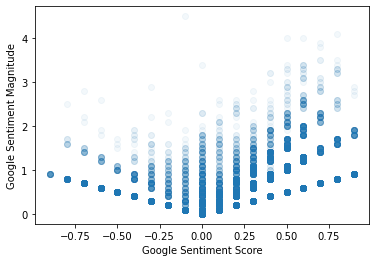

In [14]:
plt.scatter(df.G_Sentiment_Score, df.G_Sentiment_Magnitude, alpha=0.05)
plt.xlabel('Google Sentiment Score')
plt.ylabel('Google Sentiment Magnitude')

In [15]:
def score_transform_gen(score_abs_threshold):
    """We define this function generator so that we can vary the inputs to apply below."""
    def score_transform(numeric_score):
        if abs(numeric_score) < score_abs_threshold:
            return 'neutral'
        return 'positive' if numeric_score >= 0 else 'negative'

    return score_transform

To give Google the benefit of the doubt the most, let's use all possible subdivisions of the G_Sentiment_Score.

In [16]:
for score_abs_threshold in np.arange(-0.05, 0.97, 0.10):
    g_summary = df.G_Sentiment_Score.apply(score_transform_gen(score_abs_threshold))
    match_count = sum(g_summary == df.Curated_Sentiment)
    print(round(score_abs_threshold, 3), round(match_count / len(df), 3))

-0.05 0.584
0.05 0.573
0.15 0.559
0.25 0.522
0.35 0.479
0.45 0.43
0.55 0.389
0.65 0.352
0.75 0.328
0.85 0.304
0.95 0.276


We see that the absolute value threshold that maximizes agreement is 0.05, yielding agreement ratio 53.7%. Moreover, we see the agreement ratio decrease monotonically as the threshold is raised for positive thresholds. A negative threshold value results in only positive and negative labels, and we see that having neutral results helps the agreement ratio by about 2%.

Correction: If for a negative absolute threshold we map scores of 0 to 'positive' rather than to 'negative', the agreement ratio goes up to 58.4%. This makes sense because the ground truth contains a lot more positives than neutrals.